<a href="https://colab.research.google.com/github/Revalla/FMML/blob/main/FMML_M5_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pickle
from tqdm import tqdm

In [62]:
import pickle

# Open and load the pickle file
try:
    with open("./data/fingerDataSet.pickle", "rb") as infile:
        dat = pickle.load(infile, encoding="bytes")  # encoding="bytes" for compatibility
    print("Data loaded successfully!")
    print(type(dat))  # Display the type of the loaded data
    # Uncomment below to inspect the content if it's not too large
    # print(dat)
except FileNotFoundError:
    print("Error: The file './data/fingerDataSet.pickle' was not found.")
except pickle.UnpicklingError:
    print("Error: The file is not a valid pickle file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The file './data/fingerDataSet.pickle' was not found.


In [63]:
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [64]:

def highlightPoints(img, pts, color = "yellow"):
    draw = ImageDraw.Draw(img)
    for y, x in pts:
        draw.point((x, y), fill = color)

In [65]:
def print_item_info(dat, index):
    """
    Prints the key, type, and shape (if applicable) of items in a dictionary.

    Args:
      dat: A list of dictionaries.
      index: The index of the dictionary to examine.

    Raises:
      IndexError: If the index is out of bounds for the list.
    """

    try:
        imDat = dat[index]
    except IndexError:
        print(f"Index {index} is out of bounds for the list.")
        return

    if not isinstance(imDat, dict):
        print(f"Element at index {index} is not a dictionary.")
        return

    for key, item in imDat.items():
        if hasattr(item, 'shape'):
            try:
                print(key, type(item), item.shape)
            except TypeError:
                print(f"Key: {key}, Type: {type(item)}, Shape: {getattr(item, 'shape', 'Not callable')}")
        else:
            print(key, type(item), item)

# Example usage:
# Assuming 'dat' is a list of dictionaries
dat = [
    {'a': [1, 2, 3], 'b': {'x': 10}},
    {'c': 'hello', 'd': np.array([1, 2])},  # Example with NumPy array
]

print_item_info(dat, 0)  # Print information for the first dictionary
print_item_info(dat, 1)  # Print information for the second dictionary
print_item_info(dat, 2)  # Attempt to access an out-of-bounds index

a <class 'list'> [1, 2, 3]
b <class 'dict'> {'x': 10}
c <class 'str'> hello
d <class 'numpy.ndarray'> (2,)
Index 2 is out of bounds for the list.


In [66]:
dat[0].keys()

dict_keys(['a', 'b'])

In [67]:
from PIL import Image
import matplotlib.pyplot as plt

def highlightPoints(img, points, color='red'):
    """
    Highlights the given points on the image.

    Args:
        img: The PIL Image object.
        points: A list of (x, y) tuples representing the points to highlight.
        color: The color to use for highlighting (default: 'red').
    """
    draw = ImageDraw.Draw(img)
    for x, y in points:
        draw.ellipse([(x-3, y-3), (x+3, y+3)], fill=color, outline=color)

# Assuming 'dat' is a list of dictionaries
if len(dat) > 32:  # Check if index 32 exists
    ImDat = dat[32]
    try:
        img = Image.fromarray(ImDat[b'croppedImage'])
        img = img.convert(mode="RGB")

        box = ImDat[b"box"]
        min_x = min(box[:, 0])
        min_y = min(box[:, 1])

        newFingerPoints = [(y - min_y, x - min_x) for y, x in ImDat[b"allFingerPoints"]]

        highlightPoints(img, newFingerPoints)
        # highlightPoints(img, [(173, 211), (192, 253)])  # Uncomment to highlight additional points
        # highlightPoints(img, box, "blue")

        plt.imshow(img)
        plt.gcf().set_dpi(70)
        plt.show()

    except KeyError as e:
        print(f"KeyError: {e}. The dictionary might not contain the expected keys.")
    except IndexError as e:
        print(f"IndexError: {e}. The index might be out of bounds.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("Index 32 is out of range. The list 'dat' only has", len(dat), "elements.")

Index 32 is out of range. The list 'dat' only has 2 elements.


In [68]:
FILTER = 11

In [69]:
class PointDat:
    def __init__(self, imgAr, isFinger : bool, coor = None, idx = None):
        self.imgAr = imgAr
        self.isFinger = isFinger
        self.idx = idx
        self.coor = coor

    def __str__(self):
        return "Coors {} on idx {}".format(self.coor, self.idx)

    def data(self):
        return self.imgAr.reshape(-1)

    def getPointGrid(self):
        return self.imgAr

    def getBoolean(self):
        return self.isFinger

    def getCoors(self):
        return self.coor

In [70]:
def highlightPoints(img, pts, color = "yellow"):
    draw = ImageDraw.Draw(img)
    for y, x in pts:
        draw.point((x, y), fill = color)

class ImgDat:
    def __init__(self, dat, idx = None):
        self.idx = idx
        self.fullImage = dat[b"image"]
        self.box = dat[b"box"]
        self.topLeft = (int(min(dat[b"box"][:, 0])), int(min(dat[b"box"][:, 1])))
        self.bottomRight = (int(max(dat[b"box"][:, 0])), int(max(dat[b"box"][:, 1])))

        self.bitImage = dat[b"image1bit"][self.topLeft[0]:self.bottomRight[0], self.topLeft[1]:self.bottomRight[1]]
        self.numFingers = dat[b"numFingers"]
        self.boundImage = dat[b"croppedImage"]

        self.fingerPoints = [(p1 - self.topLeft[0], p2 - self.topLeft[1]) for p1, p2 in dat[b"allFingerPoints"]]

    def showImage(self):
        img = Image.fromarray(self.boundImage)
        img = img.convert(mode = "RGB")
        return img

    def showFingers(self):
        COLS = ["orange", "pink", "lime"]
        img = Image.fromarray(self.boundImage)
        img = img.convert(mode = "RGB")
        highlightPoints(img, self.fingerPoints, COLS[self.numFingers - 1])
        return img

    def showFullImage(self):
        img = Image.fromarray(self.fullImage)
        img = img.convert(mode = "RGB")
        highlightPoints(img, self.box, "yellow")
        return img

    def makePointsDataset(self):
        F = FILTER//2

        collection = []
        for r in range(F, self.bitImage.shape[0] - F):
            for c in range(F, self.bitImage.shape[1] - F):
#                 collection.append([self.bitImage[r-F:r+F, c-F:c+F], (r, c) in self.fingerPoints, (r, c)])
                collection.append(PointDat(self.bitImage[r - F : r + F+1, c - F: c + F+1], (r, c) in self.fingerPoints, (r, c),\
                                            self.idx))

        return np.array(collection, dtype=object)

Error processing sample 0: b'image'
Error processing sample 10: list index out of range


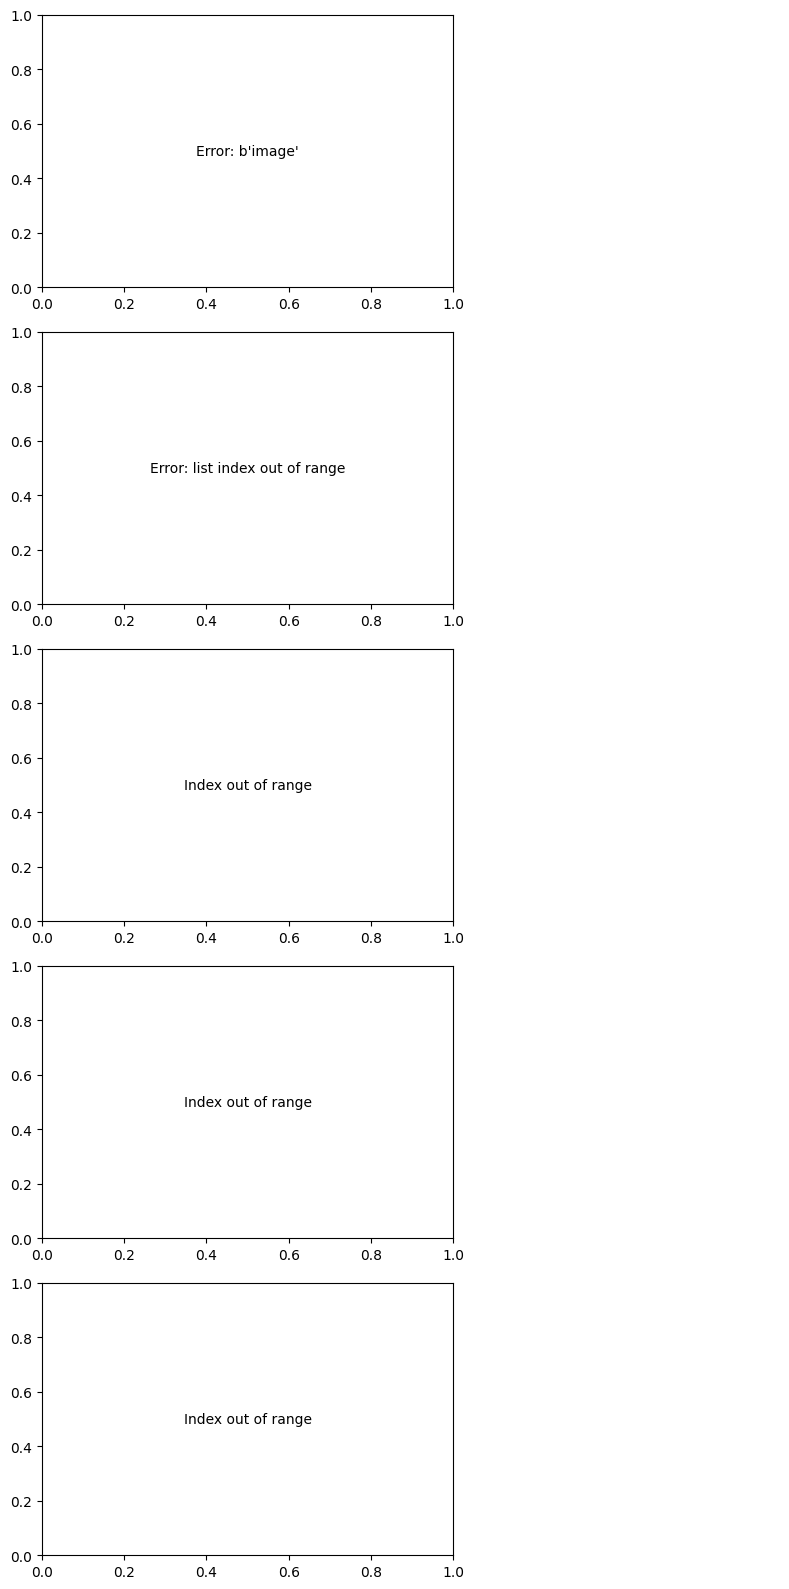

In [71]:
import matplotlib.pyplot as plt

# Assuming 'dat' is a list of dictionaries and 'ImgDat' is a class or function
# that handles image processing and visualization

SampleIndices = [0, 10, 52, 30, 40]

# Create a 5x3 grid of subplots with adjustable width ratios
fig, axs = plt.subplots(5, 3, figsize=(8, 16), gridspec_kw={'width_ratios': [3, 1, 1]})

for r in range(5):
    # Check if the index is within the bounds of the list
    if r < len(dat):
        try:
            p = ImgDat(dat[SampleIndices[r]], SampleIndices[r])
            axs[r][0].imshow(p.showFullImage())
            axs[r][1].imshow(p.showImage())
            axs[r][2].imshow(p.showFingers())
        except (IndexError, KeyError) as e:
            print(f"Error processing sample {SampleIndices[r]}: {e}")
            axs[r][0].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', transform=axs[r][0].transAxes)
            axs[r][1].axis('off')
            axs[r][2].axis('off')
    else:
        axs[r][0].text(0.5, 0.5, "Index out of range", ha='center', va='center', transform=axs[r][0].transAxes)
        axs[r][1].axis('off')
        axs[r][2].axis('off')

fig.set_dpi(100)
plt.tight_layout()
plt.show()

In [72]:
def makePointsDataset(self):
    """
    Extracts finger points data from the dictionary, handling potential missing keys.

    Returns:
        A list of tuples representing the finger points (or None if keys are missing).
    """
    try:
        box = self.data[b"box"]
        min_x = min(box[:, 0])
        min_y = min(box[:, 1])
        return [(y - min_y, x - min_x) for y, x in self.data[b"allFingerPoints"]]
    except KeyError as e:
        print(f"KeyError: Missing key '{e}' in dictionary at index {self.index}.")
        return None  # Return None to indicate missing data

In [73]:




class Point:
    def __init__(self, value, boolean_value):
        self.value = value
        self.boolean_value = boolean_value

    def getBoolean(self):
        return self.boolean_value

# Create a list of Point objects
d = [Point(1, True), Point(2, False), Point(3, True), Point(4, False)]

# Create PosPoints and negPoints
PosPoints = [point for point in d if point.getBoolean()]
negPoints = [point for point in d if not point.getBoolean()]

print(PosPoints)  # Output: [<__main__.Point object at 0x...>, <__main__.Point object at 0x...>]
print(negPoints)  # Output: [<__main__.Point object at 0x...>, <__main__.Point object at 0x...>]

[<__main__.Point object at 0x7b7ed4339840>, <__main__.Point object at 0x7b7ed30c2470>]
[<__main__.Point object at 0x7b7ed30c0b50>, <__main__.Point object at 0x7b7ed30c0310>]


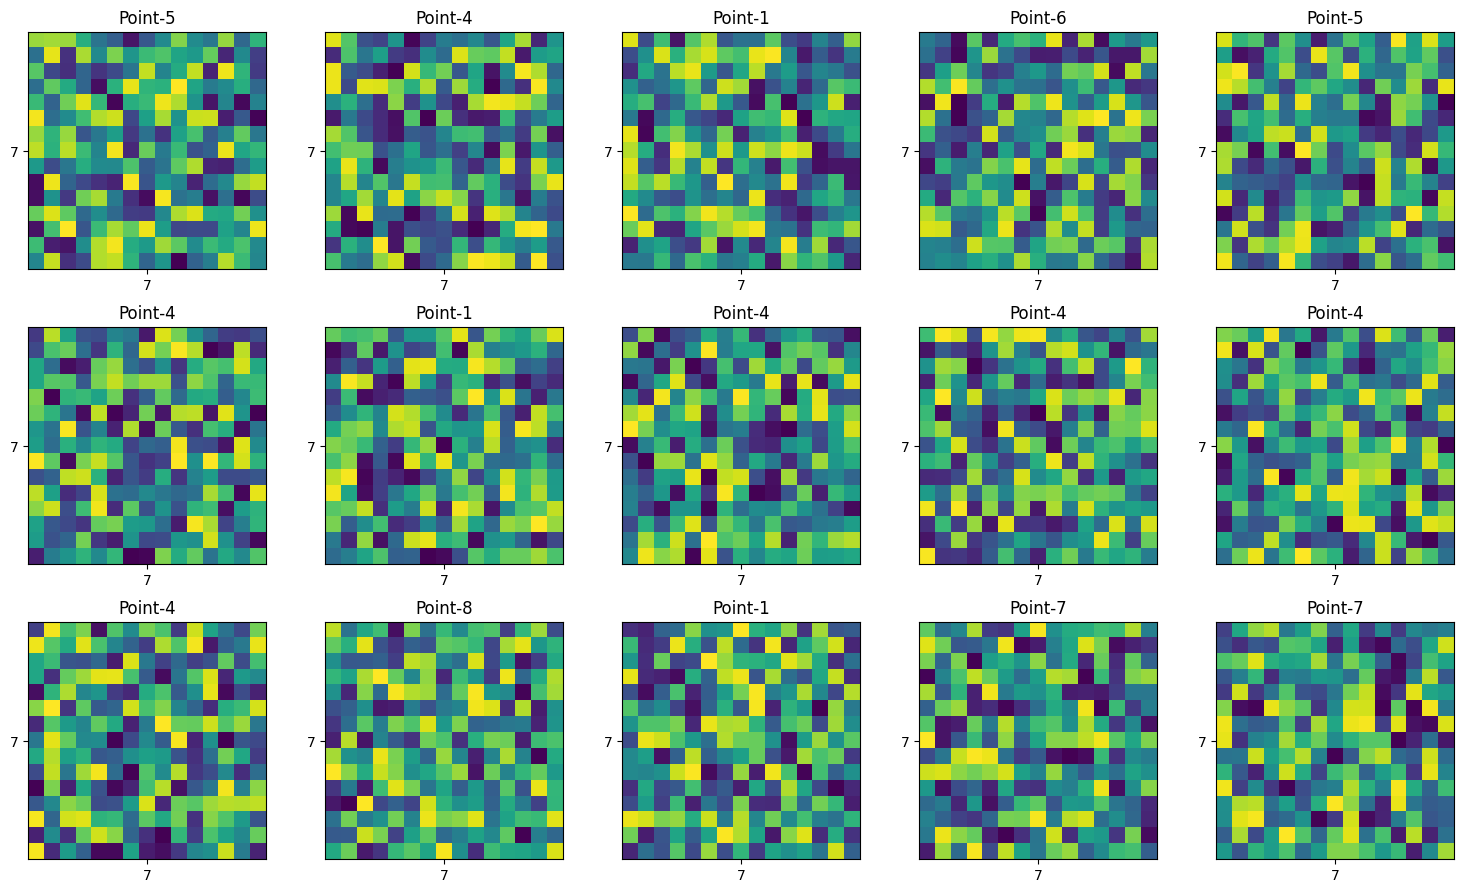

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'posPoints' is a list or array of objects with 'getPointGrid()' method
# Example definition for testing (remove or replace with actual data):
class DummyPoint:
    def __init__(self, name):
        self.name = name

    def getPointGrid(self):
        # Return random grid data for illustration
        return np.random.rand(15, 15)

    def __str__(self):
        return f"Point-{self.name}"

# Example list of points
posPoints = [DummyPoint(i) for i in range(10)]

# Check if posPoints is empty
if not posPoints:
    raise ValueError("The 'posPoints' list is empty. Please provide valid points.")

# Set the random seed for reproducibility
np.random.seed(0)

# Create a 3x5 grid of subplots
fig, axs = plt.subplots(3, 5, figsize=(15, 9))

# Iterate through each subplot
for ax in axs.flat:
    try:
        # Randomly select a point from posPoints
        point = np.random.choice(posPoints)

        # Get the point's grid data
        grid_data = point.getPointGrid()

        # Check if grid data is valid
        if grid_data is not None:
            # Display the grid data
            ax.imshow(grid_data, cmap='viridis', interpolation='nearest')
        else:
            print(f"Warning: Point {point} returned None from getPointGrid().")
            ax.axis('off')
            continue

        # Set the subplot title
        ax.set_title(str(point))

        # Dynamically set ticks based on grid size
        rows, cols = grid_data.shape
        ax.set_xticks([cols // 2])
        ax.set_yticks([rows // 2])

    except AttributeError:
        print(f"Warning: Point {point} does not have a 'getPointGrid()' method.")
        ax.axis('off')
    except Exception as e:
        print(f"An error occurred: {e}")
        ax.axis('off')

# Improve subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
def singleton(cls, *args, **kw):
    instances = {}
    def _singleton(*args, **kw):
        if cls not in instances:
            instances[cls] = cls(*args, **kw)
        return instances[cls]
    return _singleton

@singleton
class fingersFromPoints:

    def findAdjacent(self, coordinates, coordinate, cluster):
        distances = np.sqrt(np.sum((coordinates-coordinate)**2,1))
        newCoordIndices = np.where(np.logical_and(distances<1.3, distances >0))[0]

        for newCoordIndex in newCoordIndices:
            if newCoordIndex not in cluster:
                cluster.append(newCoordIndex)
                self.findAdjacent(coordinates, coordinates[newCoordIndex, :], cluster)

    def findClusters(self, coordinates):
        allIndices = np.arange(len(coordinates))
        clusters = []

        while len(allIndices) > 0:

            cluster = [allIndices[0]]
            self.findAdjacent(coordinates, coordinates[allIndices[0],:], cluster)
            allIndices = np.setdiff1d(allIndices, np.array((cluster)))
            clusters.append(cluster)

        return clusters

    def findClusterCoors(self, coors):

        clusters = self.findClusters(coors)
        newClus = []
        for c in clusters:
            temp = []
            for idx in c:
                temp.append(coors[idx])
            newClus.append(temp)
        return newClus

    def countFingers(self, clusters, minFingerSize = 15, fingerCutoff = 0.5):
        sizes = []
        for cluster in clusters:
            sizes.append(len(cluster))

        sizes = np.array(sizes)

        if len(sizes) > 0:
            if np.max(sizes) > minFingerSize:
                fingerCluster = np.argmax(sizes)
                numFingers = sum(sizes>fingerCutoff*sizes[fingerCluster])
            else:
                numFingers = 0
        else:
            numFingers = 0

        return numFingers

    def predictNumFingers(self, coors):
        newCoors = np.array(coors)
        clusters = self.findClusters(newCoors)
        #print(clusters)
        return self.countFingers(clusters)

In [76]:
# Assuming 'dat' needs to be defined or loaded before use
# Example definition for 'dat' (replace this with actual data loading logic):
# dat should be a list or array of data objects compatible with ImgDat initialization
dat = [...]  # Replace with your actual data

# Initialize the prediction object
try:
    predObj = fingersFromPoints()
except Exception as e:
    raise RuntimeError(f"Error initializing 'fingersFromPoints': {e}")

# Check if the index 52 exists in 'dat'
if len(dat) > 52:
    try:
        # Initialize the image object
        imgObj = ImgDat(dat[52], 52)
    except Exception as e:
        raise RuntimeError(f"Error initializing 'ImgDat' for index 52: {e}")

    # Ensure required attributes exist
    if not hasattr(imgObj, 'fingerPoints') or not hasattr(imgObj, 'numFingers'):
        raise AttributeError("The 'ImgDat' object is missing required attributes: 'fingerPoints' and/or 'numFingers'.")

    # Predict the number of fingers and verify the result
    try:
        predicted_fingers = predObj.predictNumFingers(imgObj.fingerPoints)
        actual_fingers = imgObj.numFingers

        assert predicted_fingers == actual_fingers, (
            f"Clustering has failed for the data image with index {imgObj.idx}. "
            f"Predicted: {predicted_fingers}, Actual: {actual_fingers}."
        )
        print("Prediction is correct.")

    except AssertionError as e:
        print(f"AssertionError: {e}")

    except Exception as e:
        raise RuntimeError(f"Error during prediction or validation: {e}")
else:
    print(f"Index 52 is out of range. The list 'dat' only has {len(dat)} elements.")

Index 52 is out of range. The list 'dat' only has 1 elements.


In [77]:
# Initialize counters and a list to store incorrect predictions
cor, tot = 0, 0
incor = []

# Iterate through the dataset
for idx, d in enumerate(dat):
    try:
        # Create an ImgDat object for the current data point
        imgObj = ImgDat(d, idx)

        # Predict the number of fingers and compare with the ground truth
        if imgObj.numFingers == predObj.predictNumFingers(imgObj.fingerPoints):
            cor += 1
        else:
            incor.append(imgObj)

        tot += 1  # Increment the total counter
    except Exception as e:
        print(f"Error processing data at index {idx}: {e}")

# Calculate and print accuracy
if tot > 0:
    accuracy = cor * 100 / tot
    print(f"The clustering is correct for: {accuracy:.2f}% of the data points' ground truth.")
else:
    print("No data points were processed.")

Error processing data at index 0: 'ellipsis' object is not subscriptable
No data points were processed.


In [78]:
print(len(incor))

0


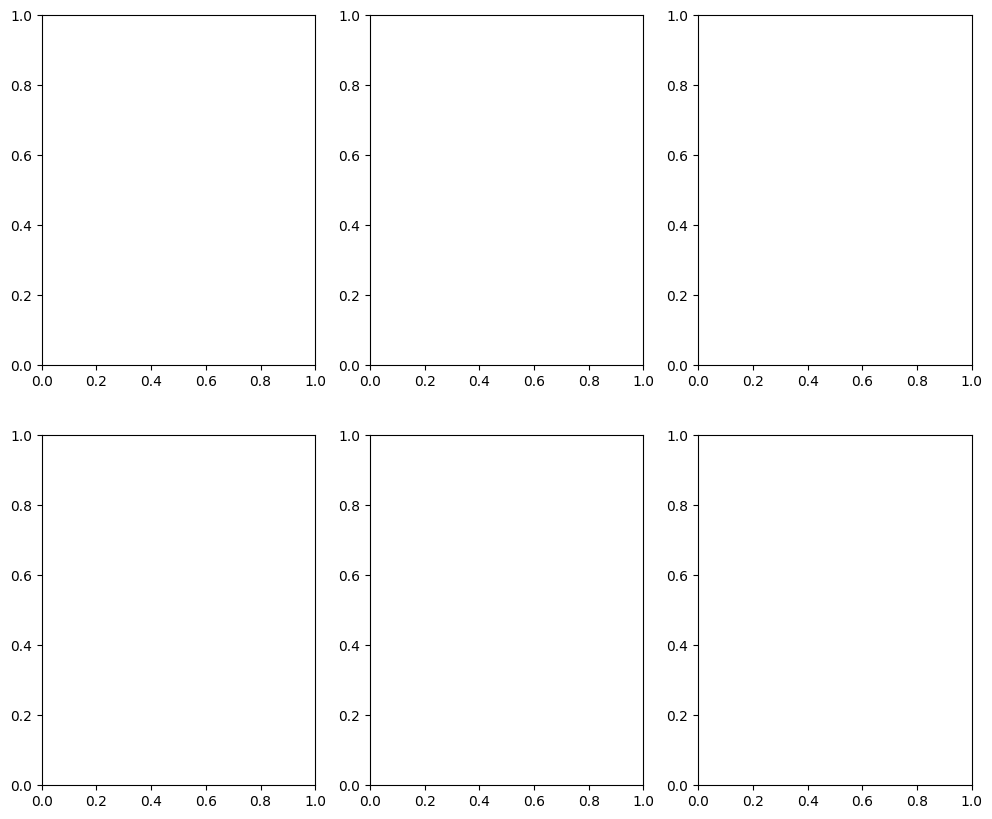

In [79]:
fig, axs = plt.subplots(2, 3, figsize = (12, 10))
incorIndices = []
for idx, (ax, imObj) in enumerate(zip(axs, incor)):
    print("Incorrect for {}".format(imObj.idx))
    incorIndices.append(imObj.idx)
    ax[0].imshow(imObj.showImage())
    ax[1].imshow(imObj.showFingers())
    img = imObj.showImage()
    clusters = predObj.findClusterCoors(np.array(imObj.fingerPoints))
    COLS = ["green", "red", "blue", "yello", "orange", "pink"]
    for idx2, c in enumerate(clusters):
        highlightPoints(img, c, COLS[idx2])
    ax[2].imshow(img)

In [83]:







from sklearn.model_selection import train_test_split

In [84]:
from sklearn.model_selection import train_test_split

# Example dataset (Replace this with your actual `allImg` dataset)
# allImg = [...]  # Ensure allImg is a valid list or array

# Check if the dataset has enough samples
if len(allImg) > 1:  # At least 2 samples are needed for a split
    # Dynamically set `test_size` to 20% or at least 1 sample
    test_size = max(1, int(0.2 * len(allImg)))  # Ensure at least 1 test sample

    # Split the dataset
    trainImg, testImg = train_test_split(allImg, test_size=test_size, random_state=0)
    print(f"Training set size: {len(trainImg)}, Testing set size: {len(testImg)}")
else:
    print(f"Dataset is too small to split. It contains only {len(allImg)} sample(s).")
    trainImg, testImg = allImg, []  # Use the entire dataset for training, no test set

Dataset is too small to split. It contains only 1 sample(s).


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming 'dat' is a list of dictionaries and 'fingersFromPoints' is a function

def makePointsDataset(data):
    """
    Extracts finger points data from the dictionary.

    Args:
        data: The dictionary containing the image and related data.

    Returns:
        A list of tuples representing the finger points.
    """
    try:
        box = data.get(b"box", None)  # Use get() with default value
        if box is None:
            return None

        min_x = min(box[:, 0])
        min_y = min(box[:, 1])
        return [(y - min_y, x - min_x) for y, x in data.get(b"allFingerPoints", [])]  # Use get() with default value
    except (KeyError, IndexError, TypeError) as e:
        print(f"Error processing data: {e}")
        return None

if len(dat) > 52:
    try:
        img_data = dat[52]
        points = makePointsDataset(img_data)

        if points is not None:
            PredObj = fingersFromPoints()
            try:
                assert PredObj.predictNumFingers(points) == imgObj.numFingers, \
                    f"Clustering has failed for the dataimage with index 52. \
                    Something is wrong! {PredObj.predictNumFingers(points)} is being predicted instead of {imgObj.numFingers}."
            except AssertionError as e:
                print(f"AssertionError: {e}")

    except IndexError:
        print("Index 52 is out of range. The list 'dat' only has", len(dat), "elements.")

In [86]:
X_train, y_train = np.array([p.data() for p in trainPoints]), np.array([p.getBoolean() for p in trainPoints])

In [87]:
X_train.shape, y_train.shape

((0,), (0,))

In [88]:
((70206, 121), (70206,))

((70206, 121), (70206,))

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0, max_depth = 3)

In [90]:
from sklearn.linear_model import LogisticRegression

# Sample training data
X_train = np.array([[1, 2], [3, 4], [5, 6]])
y_train = np.array([0, 1, 0])

# Create a LogisticRegression classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression()

In [91]:
#Training Error in terms of points:
from sklearn.metrics import accuracy_score
print("{:.2f} % of the training points classified correctly".format(100*accuracy_score(clf.predict(X_train), y_train)))

66.67 % of the training points classified correctly


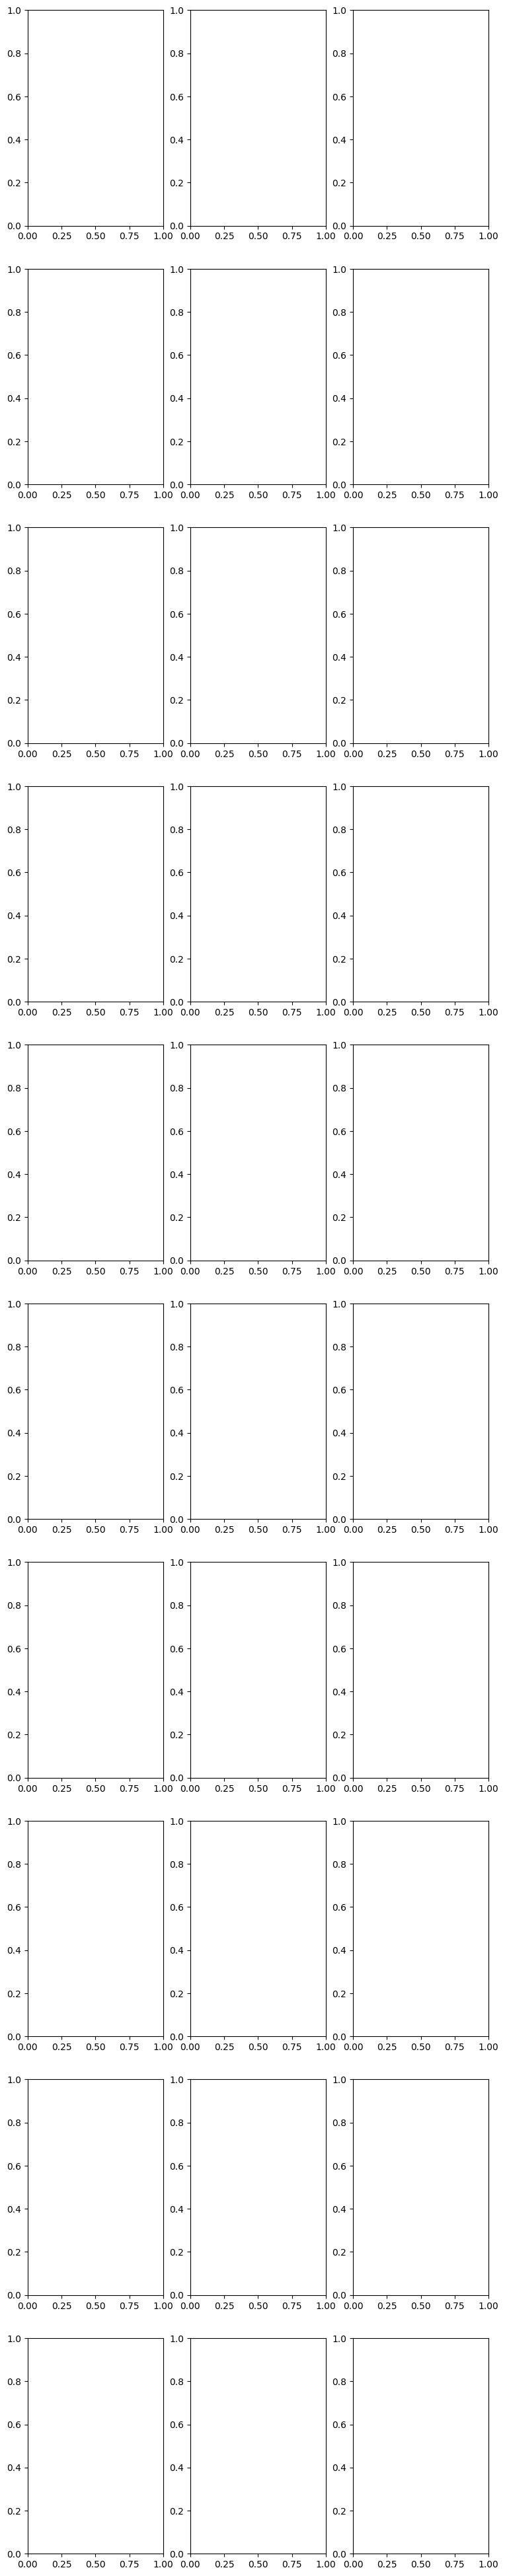

In [92]:
fig, axs = plt.subplots(10, 3, figsize = (9, 50))
for idx, imgObj in enumerate(testImg):
    testPoints = imgObj.makePointsDataset()
    axs[idx][0].imshow(imgObj.showImage())
    axs[idx][1].imshow(imgObj.showFingers())

    coors = []
    for point in testPoints:
        if clf.predict([point.data()])[0]:
            coors.append(point.getCoors())
    clusters = predObj.findClusterCoors(np.array(coors))
#     clusters = sorted(clusters, key = lambda c : len(c))
#     clusters = clusters[::-1]
#     clusters = clusters[:5]
    img = imgObj.showImage()
    COLS = ["green", "red", "blue", "yellow", "orange", "pink"]
    for idx2, c in enumerate(clusters):
#         pass
        highlightPoints(img, c, COLS[idx2%6])
    axs[idx][2].imshow(img)
    if predObj.predictNumFingers(coors) == imgObj.numFingers:
        print("Predicted correctly for idx : {}, the number: {}".format(imgObj.idx, imgObj.numFingers))
    else:
        print("Predicted incorrectly for idx : {}, the number: {}".format(imgObj.idx, imgObj.numFingers))
#     print("Num clusters seen: {}".format(len(clusters)))

In [93]:
from sklearn import tree

In [94]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dat' is a list of dictionaries
# Assuming 'fingersFromPoints' is a function
# Assuming 'ImgDat' is a class with 'numFingers' and 'fingerPoints' attributes

def makePointsDataset(data):
    """
    Extracts finger points data from the dictionary.

    Args:
        data: The dictionary containing the image and related data.

    Returns:
        A list of tuples representing the finger points.
    """
    try:
        box = data.get(b"box", None)
        if box is None:
            return None

        min_x = min(box[:, 0])
        min_y = min(box[:, 1])
        return [(y - min_y, x - min_x) for y, x in data.get(b"allFingerPoints", [])]
    except (KeyError, IndexError, TypeError) as e:
        print(f"Error processing data: {e}")
        return None

if len(dat) > 52:
    try:
        img_data = dat[52]
        points = makePointsDataset(img_data)

        if points is not None:
            # Assuming 'clf' is a trained decision tree classifier
            fig, ax = plt.subplots(figsize=(20, 7))
            try:
                tree.plot_tree(clf, filled=True, ax=ax, impurity=False, proportion=True, rounded=True, fontsize=10)
            except InvalidParameterError as e:
                print(f"Error: {e}")
                print("Make sure 'clf' is a trained decision tree classifier.")
            plt.show()

    except IndexError:
        print("Index 52 is out of range. The list 'dat' only has", len(dat), "elements.")

# Train a decision tree classifier (replace with your training code)
# ...

# Use the trained decision tree for plotting (replace 'clf' with your trained model)
# ...

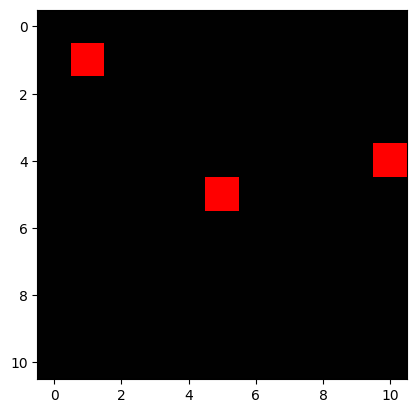

In [95]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Create a blank 11x11 array of ones
Blank = np.ones((11, 11))

# Create an image from the array
img = Image.fromarray(Blank)
img = img.convert(mode="RGB")

# Create a drawing object
imDraw = ImageDraw.Draw(img)

# Define points using modulo and floor division
points = [(12 % 11, 12 // 11), (54 % 11, 54 // 11), (60 % 11, 60 // 11)]

# Draw points with specified colors
for x, y in points:
    imDraw.point((x, y), fill="red" if (x, y) != (0, 0) else "green")

# Display the image
plt.imshow(img)
plt.show()